## Homework 13: NLP
### fahad ahmed, fs05847
#### fs05847@st.habib.edu.pk

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
from tika import parser

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
#Extract all parts of speech from any text
chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<P> <NP>}          #To extract Prepostional Phrases
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases
                       """)

# Part 1: NER

In [12]:
nlp = en_core_web_sm.load()

In [13]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

Article link: https://www.dailymail.co.uk/sport/football/article-10723951/Thibaut-Courtois-claims-Barcelonas-4-0-demolition-Real-Madrid-month-FLUKE.html

In [14]:
ny_bb = url_to_string('https://www.dailymail.co.uk/sport/football/article-10723951/Thibaut-Courtois-claims-Barcelonas-4-0-demolition-Real-Madrid-month-FLUKE.html')
article = nlp(ny_bb)
len(article.ents)

668

### this arricle has 668 words

In [15]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 220,
         'GPE': 107,
         'CARDINAL': 57,
         'ORG': 157,
         'DATE': 50,
         'WORK_OF_ART': 8,
         'LOC': 4,
         'EVENT': 7,
         'NORP': 17,
         'FAC': 6,
         'PRODUCT': 3,
         'ORDINAL': 18,
         'MONEY': 9,
         'LAW': 1,
         'TIME': 2,
         'LANGUAGE': 1,
         'QUANTITY': 1})

as we can see from that artcle is talking about money for 9 times
220 times the articles says something related to person.

In [16]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Barcelona', 18), ('Chelsea', 15), ('Liverpool', 14)]

as we can see the article is talking about barcelona, Chlease and liverpool

In [17]:
sentences = [x for x in article.sents]
print(sentences[10])

Share this article Share 26k shares  'If you look at our results and our performance it was a fluke.


In [18]:
displacy.render(nlp(str(sentences[10])), jupyter=True, style='ent')

In [19]:
dict([(str(x), x.label_) for x in nlp(str(sentences[10])).ents])

{'26k': 'DATE'}

Error: algorithm mixing the date with amount as we can see 26k is some sort of amount but for sure it is not a date.

Lemmatization

In [20]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

as we can in the above results algorithm is finding as much as NER in the article. GPE means any sort of location so barcelona is highlighted as GPE.
"17th 2022 8PM" is defined as Date
the first-two words "Thibaut Courtois" is defined as Person. 

# Part 2: PDF Parser

In [21]:
raw = parser.from_file('C:/Users/HP/OneDrive/Desktop/dataSci/hw13/journal.pone.0244780.pdf')

2022-04-19 03:08:57,963 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


PDF is attached in the zip file

Text Summarization

In [22]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [23]:
filtered_word_freq.most_common(25)

[('https', 135),
 ('COVID-19', 110),
 ('towards', 63),
 ('knowledge', 62),
 ('public', 59),
 ('study', 58),
 ('Ethiopia', 55),
 ('Addis', 54),
 ('Ababa', 53),
 ('attitude', 47),
 ('practice', 38),
 ('pandemic', 37),
 ('//doi.org/10.1371/journal.pone.0244780', 36),
 ('participants', 36),
 ('PLOS', 33),
 ('ONE', 33),
 ('response', 32),
 ('http', 31),
 ('service', 30),
 ('providers', 27),
 ('January', 24),
 ('information', 24),
 ('among', 23),
 ('Health', 22),
 ('washing', 22)]

the most common usefull word in the pdf is "COVID-!9" with frequency of 110

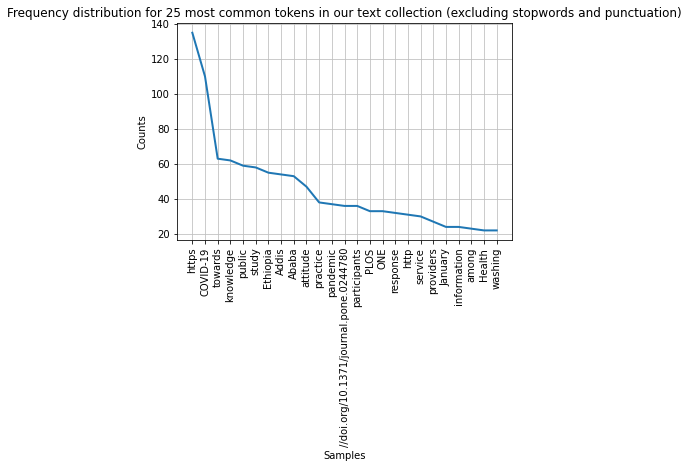

<AxesSubplot:title={'center':'Frequency distribution for 25 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [24]:
filtered_word_freq.plot(25,title='Frequency distribution for 25 most common tokens in our text collection (excluding stopwords and punctuation)')

graph is for word frequency of top 25 words in the pdf. At the top we have "http" with frequency between 130-140 and the second most common word is "COVID-19" with frequency around 120.

tech 2

In [25]:
import yake

In [26]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Addis Ababa Ethiopia', 5.337359066251877e-05)
('Ababa Ethiopia PLOS', 7.800077109826536e-05)
('Addis Ababa', 0.00015689193711171005)
('School of Medicine', 0.00017993681263475875)
('Addis Ababa University', 0.0002670924196381709)
('Child Health Department', 0.0003898430341531309)
('Ababa Ethiopia', 0.0005849606951351966)
('Ethiopia PLOS', 0.00083395524796793)
('Addis', 0.001663781457666366)
('Ethiopia', 0.0017229437092788045)
('Ababa', 0.0017318658159342535)
('Knowledge', 0.0019715768676239567)
('Internal Medicine', 0.00223007931278374)
('Sciences Addis Ababa', 0.002522199038367675)
('public', 0.002733188104522622)
('public KAP', 0.00276834312289348)
('Ababa University', 0.0028859817320406665)
('Department of Microbiology', 0.00296756127756409)
('Department of Psychiatry', 0.00296756127756409)
('Department of Surgery', 0.00296756127756409)


the above results shows the mos important keywords in the pdf.
the above result show that most important keyword according to Yake algorithm is "Addis Ababa Ethiopia"

tech 3

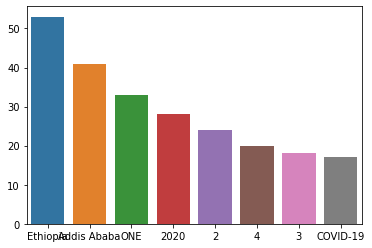

In [36]:
import seaborn as sns
doc = nlp(raw['content'].strip('\n'))
items = [x.text for x in doc.ents]
output = Counter(items).most_common(8)

x = [i[0] for i in output]
y = [i[1] for i in output]
# PLOTTING
ax = sns.barplot(x, y)

word count accoridng to Spacy. 2020 has appeard around 30 times in the pdf.

part 3: twitter

In [ ]:
import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

In [ ]:
consumer_key = 'eR1zb853CsroHzovzLiJNPBK8'
consumer_key_secret = 'SMTGv6dLoAj81HAJ1q0I8DQ19pTTscdAINCXynLHdxb6tUDVjA'
access_token = '107436862-6ywCOzDd5bSHLZd3BWJ3buacPsL4OpWmhV5Lu9Uk'
access_token_secret = 'JAfDMXeg0OYz9ax8dELqvSlfX1sduHDVHnslVWwJjiJc2'
auth = tw.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Create a custom search term and define the number of tweets
search_tweets = "#pti -filter:retweets"

tweets = tw.Cursor(api.search_tweets,
                   q=search_tweets,
                   lang="en",
                   since='2022-04-06').items(1000)

In [ ]:
searched_tweets = [t for t in tweets]

In [ ]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_IK_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_IK_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_pti.csv',index=False)

In [38]:
def remove_url(txt):
    #Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [39]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])
tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [40]:
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data_clean_will.csv',index=False)
tweet_dataset = pd.read_csv('tweet_data_clean_will.csv')

In [41]:
def tweet_sentiment(txt):
    analysis = TextBlob(txt)
    if analysis.sentiment[0]>=0:
       res = 'positive'
    else:
       res= 'negative'
    return(res)

In [42]:
tweet_dataset['sentiment'] = np.vectorize(tweet_sentiment)(tweet_dataset['text'])

In [46]:
tweet_dataset['sentiment'].value_counts()

positive    869
negative    131
Name: sentiment, dtype: int64

most of tweets for pit are postive

In [43]:
tweet_dataset.head(20)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1516176751294038033,SaboorKakar11 FreeEagle LALMALHI MaryamNSharif...,0,0,Mon Apr 18 22:08:01 +0000 2022,positive
1,1516176720499519490,NaveedAmughal FreeEagle WajidKJ Who are we PTI...,0,0,Mon Apr 18 22:07:54 +0000 2022,positive
2,1516176648575627267,syedGardezi7 HassanJ8211 Who are we PTI BOTSWh...,0,0,Mon Apr 18 22:07:36 +0000 2022,positive
3,1516176577830211584,MaryamNSharif Who are we PTI BOTSWhat do we do...,0,0,Mon Apr 18 22:07:20 +0000 2022,positive
4,1516175203725975565,iihtishamm Ye sb hm Bots ki mehnat ki kamai ha...,0,0,Mon Apr 18 22:01:52 +0000 2022,negative
5,1516174960548589568,Some BOT dance for us Robots Baby do you love ...,1,1,Mon Apr 18 22:00:54 +0000 2022,positive
6,1516174485463961606,ShireenMazari1 she is the most aggressive PTI ...,0,1,Mon Apr 18 21:59:01 +0000 2022,positive
7,1516174221206073356,Security checking MinarePakistan jalsa21aprilm...,0,0,Mon Apr 18 21:57:58 +0000 2022,positive
8,1516174184778399744,awaissaleem77 These are all PTI amp SKMTH offi...,0,0,Mon Apr 18 21:57:49 +0000 2022,positive
9,1516173251776548873,ShkhRasheed Sheikh Sahib cleverly worded in Aw...,1,0,Mon Apr 18 21:54:07 +0000 2022,positive


In [49]:
tweet_dataset.sort_values(by=['retweet_count'], ascending=False).head(1)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
442,1516062715495780362,Kudos to AliAminKhanPTI His political moves re...,238,220,14:34:53,positive


the highest retweet is 'Kudos to AliAminKhanPTI His political moves re...' which tells that tweet talks about Ali Amin Khan who is member of PTI political party.

<AxesSubplot:ylabel='sentiment'>

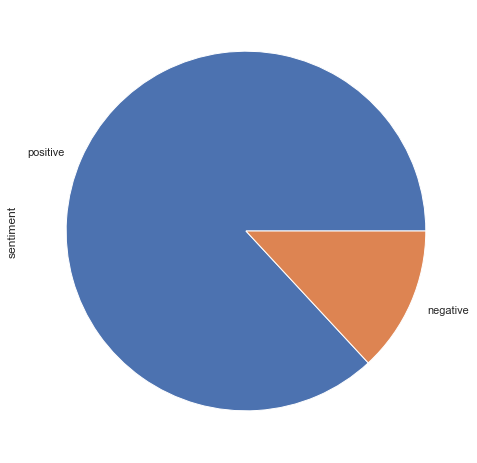

In [50]:
tweet_dataset.sentiment.value_counts().plot(kind='pie')

from graph we see the postive tweets are much higher than negative tweets.

In [52]:
tweet_dataset[tweet_dataset.sentiment == 'negative'].sample(n=1)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
514,1516032113073700866,Im just surprised Why Im seeing fake hashTagsB...,0,0,12:33:16,negative


the tweets says something about fake tweets so sentiment is negative so algorithm is working fine.

In [54]:
tweet_dataset[tweet_dataset.sentiment == 'positive'].sample(n=1)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
368,1516080158033207298,Imran khan supporters in chicago chicago pti i...,0,0,15:44:11,positive


In [ ]:
the tweets says supports so sentiment should be postive so algorithm in this case is working fine